### Problem 10.1∗ Show that the operation in equation 10.3 is equivariant with respect to translation.

\begin{align}
    \mathbf{x}_i &= [x_i, x_{i+1}, x_{i+2}] \\
    \mathbf{f}_i(\mathbf{x}) &= \omega \cdot  \mathbf{x}_i\\
    t(x_i) &= x_{i+\tau} \\
    \mathbf{t}(\mathbf{x}_i) &= [t(x_i), t(x_{i+1}), t(x_{i+2})] = \mathbf{x}_{i+\tau} \\
    f_i(\mathbf{t}(\mathbf{x})) &= \mathbf{\omega} \cdot \mathbf{t}(\mathbf{x}_i) \\
    &= \mathbf{f}_{i+\tau}(\mathbf{x}) \\
    &= t(\mathbf{f}_{i}(\mathbf{x}))
\end{align}

### Problem 10.2 Equation 10.3 defines 1D convolution with a kernel size of three, stride of one, and dilation one. Write out the equivalent equation for the 1D convolution with a kernel size of three and a stride of two as pictured in figure 10.3a–b.

Indexing from 0 and with kernel size $K$, stride $s$, and dilation $d$, we have, generally

\begin{align}        
    z_j &= \sum\limits_{k=0}^{K}\omega_k x_q \\
    q &= sj + d\left(k - \left\lfloor\frac{K}{2}\right\rfloor\right)
\end{align}

so 

\begin{align}
    z_j &= \omega_0 x_{2j - 1} + \omega_1 x_{2j} + \omega_2 x_{2j + 1} \\    
\end{align}

### Problem 10.3 Write out the equation for the 1D dilated convolution with a kernel size of three and a dilation rate of two, as pictured in figure 10.3d.

\begin{align}
    z_j &= \omega_0 x_{j-2} + \omega_1 x_{j} + \omega_2 x_{j + 2} \\    
\end{align}

### Problem 10.4 Write out the equation for a 1D convolution with kernel size of seven, a dilation rate of three, and a stride of three.

\begin{align}
    z_j &= \omega_0 x_{3j-9} + \omega_1 x_{3j-6} + \omega_2 x_{3j-3} + \omega_3 x_{3j} + \omega_4 x_{3j+3} + \omega_5 x_{3j+6} + \omega_6 x_{3j+9}
\end{align}

### Problem 10.5 Draw weight matrices in the style of figure 10.4d for (i) the strided convolution in figure 10.3a–b, (ii) the convolution with kernel size 5 in figure 10.3c, and (iii) the dilated convolution in figure 10.3d.

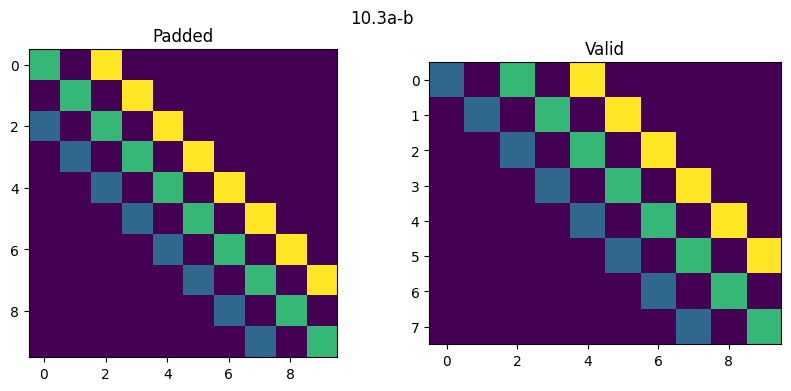

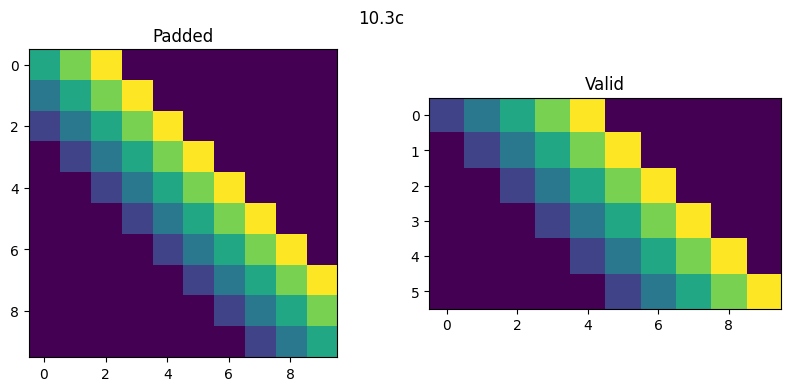

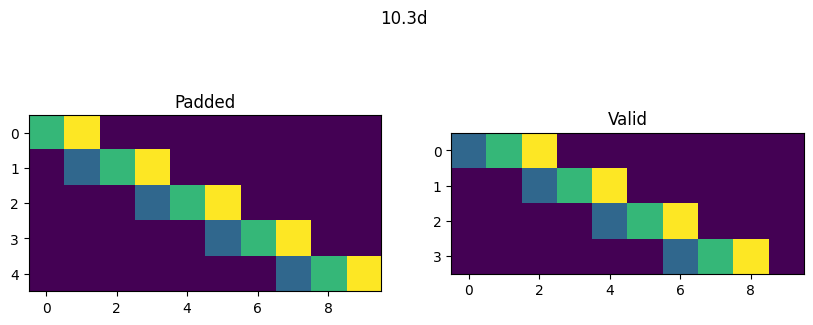

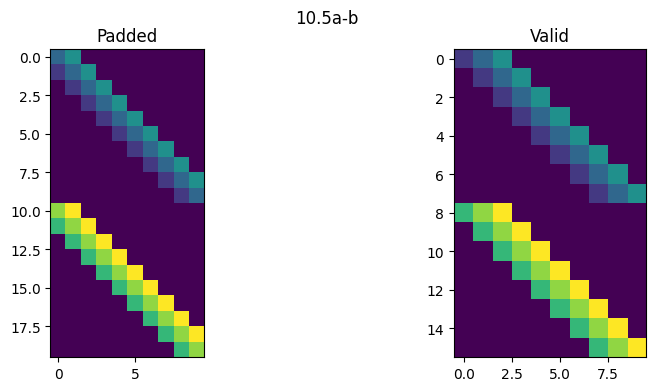

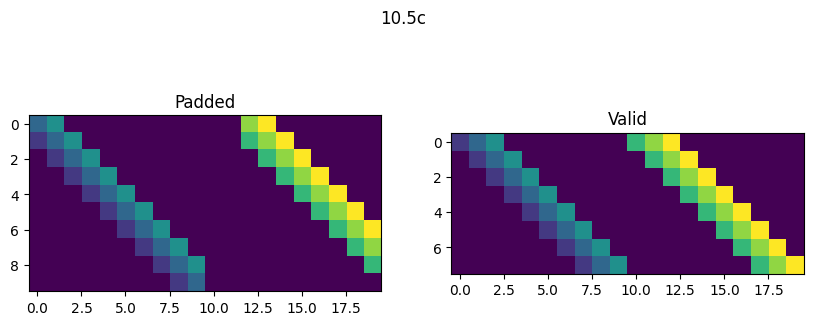

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math


def generate_weight_matrix(
    n_in: int, 
    kernel_size: int, 
    dilation: int, 
    stride: int, 
    c_in: int = 1,
    c_out: int = 1,
    pad: bool=True,
):
    assert kernel_size % 2 == 1
    
    effective_n_in = n_in + (kernel_size - 1) if pad else n_in
    n_hidden = math.ceil((effective_n_in - (kernel_size-1))  / stride)
    
    mat = np.zeros((c_out * n_hidden, c_in * n_in))
    omega = np.arange(1, c_out*c_in * (kernel_size+1))
    
    for h in range(n_hidden):
        for k in range(kernel_size):
            shift = dilation * (k - kernel_size // 2) if pad else dilation * k
            q = stride * h + shift
            if q < 0 or q >= n_in:
                continue
                
            for ci in range(c_in):
                for co in range(c_out):
                    qq = q + ci*effective_n_in
                    if qq < 0 or qq >= c_in*n_in:
                        continue
                    
                    hh = h + co*n_hidden
                    # Not generally applicable to multi-channel to multi-channel arrays
                    kk = k + co*kernel_size + ci*kernel_size
                    mat[hh, qq] = omega[kk]
    return mat

configs = (
    (3, 2, 1, 1, 1, '10.3a-b'),
    (5, 1, 1, 1, 1, '10.3c'),
    (3, 1, 2, 1, 1, '10.3d'),
    (3, 1, 1, 1, 2, '10.5a-b'),
    (3, 1, 1, 2, 1, '10.5c'),  # This doesn't quite work, but I've spent enough time on this exercise
)

for (kernel_size, dilation, stride, c_in, c_out, title) in configs:
    fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

    mat = generate_weight_matrix(10, kernel_size, dilation, stride, c_in, c_out, pad=True)
    axes[0].imshow(mat)
    axes[0].set_title('Padded')

    mat = generate_weight_matrix(10, kernel_size, dilation, stride, c_in, c_out, pad=False)
    axes[1].imshow(mat)
    axes[1].set_title('Valid')
    fig.suptitle(title)


### Problem 10.6∗ Draw a 12×6 weight matrix in the style of figure 10.4d relating inputs x1 , . . . , x6 to outputs h1 , . . . , h12 in the multi-channel convolution as depicted in figures 10.5a–b.

See above

### Problem 10.7∗ Draw a 6×12 weight matrix in the style of figure 10.4d relating inputs h1 , . . . , h12 to outputs h′1 , . . . , h′6 in the multi-channel convolution in figure 10.5c.

See above

### Problem 10.8 Consider a 1D convolutional network where the input has three channels. The first hidden layer is computed using a kernel size of three and has four channels. The second hidden layer is computed using a kernel size of five and has ten channels. How many biases and how many weights are needed for each of these two convolutional layers?

The first layer needs C_in * K_1 * C_1 = 3*3*4 = 36 weights and C_1 = 4 biases. The second layer need C_1 * K_2 * C_2 =  4 * 5 * 10 = 200 weights and C_2 = 10 biases.

### Problem 10.9 A network consists of three 1D convolutional layers. At each layer, a zero-padded convolution with kernel size three, stride one, and dilation one is applied. What size is the receptive field of the hidden units in the third layer?

With a kernel size of three, the receptive field grows by two units for each layer.  H1 sees 3 units, H2 sees 5, and H3 sees 7.

### Problem 10.10 A network consists of three 1D convolutional layers. At each layer, a zero-padded convolution with kernel size seven, stride one, and dilation one is applied. What size is the receptive field of hidden units in the third layer?

With a kernel size of seven, the receptive field grows by 6 each layer, so H1 sees 7 units, H2 sees 13 units, and H3 sees 19 units.

### Problem 10.11 Consider a convolutional network with 1D input x. The first hidden layer H1 is computed using a convolution with kernel size five, stride two, and a dilation rate of one. The second hidden layer H2 is computed using a convolution with kernel size three, stride one, and a dilation rate of one. The third hidden layer H3 is computed using a convolution with kernel size five, stride one, and a dilation rate of two. What are the receptive field sizes at each hidden layer?

H3 sees 5 neighboring units in H2.  Each unit in H2 sees three neighboring units, meaning H3 sees two additional units wide on either size fo the block of H2 it sees or 9 units in total into H1. 9 units of H1 observe 5 + 2*8 = 21 units of the input layer.

### Problem 10.12 The 1D convolutional network in figure 10.7 was trained using stochastic gradient descent with a learning rate of 0.01 and a batch size of 100 on a training dataset of 4,000 examples for 100,000 steps. How many epochs was the network trained for?

The network was trained for steps * batch_size / examples = 100000 * 100 / 4000 = 2500 epochs

### Problem 10.13 Draw a weight matrix in the style of figure 10.4d that shows the relationship between the 24 inputs and the 24 outputs in figure 10.9.

This will be a 24x24 banded matrix with 6 distinct bands. The implementation algebra is fiddly, and not helpful in shaping my intuition at this point, given I wrote a generic version of the 1d above.  

### Problem 10.14 Consider a 2D convolutional layer with kernel size 5×5 that takes 3 input channels and returns 10 output channels. How many convolutional weights are there? How many biases?

There are (5x5)x3 = 75 weights per output channel so 750 weights in total.  There are 10 biases, one for each output channel.

### Problem 10.15 Draw a weight matrix in the style of figure 10.4d that samples every other variable in a 1D input (i.e., the 1D analog of figure 10.11a). Show that the weight matrix for 1D convolution with kernel size three and stride two is equivalent to composing the matrices for 1D convolution with kernel size three and stride one and this sampling matrix.

The sampling matrix is a checkerboard pattern.

### Problem 10.16∗ Consider the AlexNet network (figure 10.16). How many parameters are used in each convolutional and fully connected layer? What is the total number of parameters?

In [64]:
c1 = 11*11*3*96 + 96
c2 = 5*5*96*256 + 256
c3 = 3*3*256*384 + 384
c4 = 3*3*384*384 + 384
c5 = 3*3*384*256 + 256
c6 = 9216*4096 + 4096
c7 = 4096*4096 + 4096
c8 = 4096*1000 + 1000
c9 = 1000*1000 + 1000
params = [c1, c2, c3, c4, c5, c6, c7, c8, c9]
total = sum(params)

print('Total:', total)
for i, p in enumerate(params): 
    print(f"Layer {i+1}: {p:>20} {p/total:>10.3f}")

Total: 63379344
Layer 1:                34944      0.001
Layer 2:               614656      0.010
Layer 3:               885120      0.014
Layer 4:              1327488      0.021
Layer 5:               884992      0.014
Layer 6:             37752832      0.596
Layer 7:             16781312      0.265
Layer 8:              4097000      0.065
Layer 9:              1001000      0.016


### Problem 10.17 What is the receptive field size at each of the first three layers of AlexNet (figure 10.16)?

### Problem 10.18 How many weights and biases are there at each convolutional layer and fully connected layer in the VGG architecture (figure 10.17)?

### Problem 10.19∗ Consider two hidden layers of size 224×224 with C1 and C2 channels, respectively, connected by a 3×3 convolutional layer. Describe how to initialize the weights using He initialization.